
# This code shows an example for using the imported data from a modified .mat file into a artificial neural network and its training


In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score # in order to test the results
from sklearn.grid_search import GridSearchCV # looking for parameters
import pickle #saving to file



# Importing preprocessing data

In [3]:
#this function reads the file 
def read_data(archive, rows, columns):
    data = open(archive, 'r')
    mylist = data.read().split()
    data.close()
    myarray = np.array(mylist).reshape(( rows, columns)).astype(float)
    return myarray
    

In [16]:
data = read_data('../get_data_example/set.txt',72, 12)
X = data[:, [0, 2, 4, 6, 7, 8, 9, 10, 11]]
#print pre_X.shape, data.shape
y  = data[:,1]
#print y.shape

#getting the time vector for plotting purposes
time_stamp = np.zeros(data.shape[0])
for i in xrange(data.shape[0]):
        time_stamp[i] = i*(1.0/60.0)
        
#print X.shape, time_stamp.shape
X = np.hstack((X, time_stamp.reshape((X.shape[0], 1))))
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
t_test = X_test[:,-1]
t_train = X_train[:, -1]
X_train_std = preprocessing.scale(X_train[:,0:-1])
X_test_std = preprocessing.scale(X_test[:, 0:-1])

(72, 10)


## Sorting out  data (for plotting purposes)

In [17]:
#Here comes the way to sort out the data according to one the elements of it
test_sorted = np.hstack(
    (t_test.reshape(X_test_std.shape[0], 1), X_test_std, y_test.reshape(X_test_std.shape[0], 1)))

test_sorted = test_sorted[np.argsort(test_sorted[:,0])] #modified

train_sorted = np.hstack((t_train.reshape(t_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1) ))
train_sorted = train_sorted[np.argsort(train_sorted[:,0])]

## Artificial Neural Network

In [ ]:
#Grid search, random state =0: same beginning for all
alpha1 = np.linspace(0.001,0.9, 10).tolist()
momentum1 = np.linspace(0.3,0.9, 10).tolist()
params_dist = {"hidden_layer_sizes":[(20, 40), (15, 40), (10,15), (15, 15, 10), (15, 10),(20, 20), (15, 5)],
               "activation":['tanh','logistic'],"algorithm":['sgd', 'l-bfgs'], "alpha":alpha1,
               "learning_rate":['constant'],"max_iter":[500], "random_state":[0],
               "verbose": [False], "warm_start":[False], "momentum":momentum1}
grid = GridSearchCV(MLPRegressor(), param_grid=params_dist)
grid.fit(X_test_std, y_test)

print "Best score:", grid.best_score_
print "Best parameter's set found:\n"
print grid.best_params_ 

## Plotting

In [ ]:
%matplotlib inline

results = grid.predict(test_sorted[:, 1:-1])

plt.plot(test_sorted[:, 0], results, c='r') # ( sorted time, results)
plt.plot(train_sorted[:, 0], train_sorted[:,1], c='b' ) #expected
plt.scatter(time_stamp, y, c='k')

plt.xlabel("Time(s)")
plt.ylabel("Angular velocities(rad/s)")

red_patch = mpatches.Patch(color='red', label='Predicted')
blue_patch = mpatches.Patch(color='blue', label ='Expected')
black_patch = mpatches.Patch(color='black', label ='Original')
plt.legend(handles=[red_patch, blue_patch, black_patch])
plt.title("MLP results vs Expected values")
plt.show()

print "Accuracy:", grid.score(X_test_std, y_test)
#print "Accuracy test 2", r2_score(test_sorted[:,-1], results)


## Saving ANN to file through pickle (and using it later)

In [ ]:
#This prevents the user from losing a previous important result
def save_it(ans):
    if ans == "yes":
        f = open('data.ann', 'w')
        mem = pickle.dumps(grid)
        f.write(mem)
        f.close()
    else:
        print "Nothing to save"        
        
        
save_it("no")

In [5]:
#Loading a successful ANN
f = open('data.ann', 'r')
nw = f.read()
saved_ann = pickle.loads(nw)
print "Just the accuracy:", saved_ann.score(X_test_std, y_test), "\n"
print "Parameters:"
print saved_ann.get_params(), "\n"
print "Loss:", saved_ann.loss_
print "Total of layers:", saved_ann.n_layers_
print "Total of iterations:", saved_ann.n_iter_


Just the accuracy: 0.898618497718 

Parameters:
{'beta_1': 0.9, 'warm_start': False, 'beta_2': 0.999, 'shuffle': False, 'nesterovs_momentum': True, 'algorithm': 'l-bfgs', 'hidden_layer_sizes': (10, 15), 'epsilon': 1e-08, 'activation': 'logistic', 'max_iter': 500, 'batch_size': 'auto', 'power_t': 0.5, 'random_state': None, 'learning_rate_init': 0.001, 'tol': 1e-09, 'validation_fraction': 0.1, 'alpha': 0.001, 'momentum': 0.8, 'learning_rate': 'constant', 'early_stopping': False, 'verbose': False} 

Loss: 0.00322498086329
Total of layers: 4
Total of iterations: 501


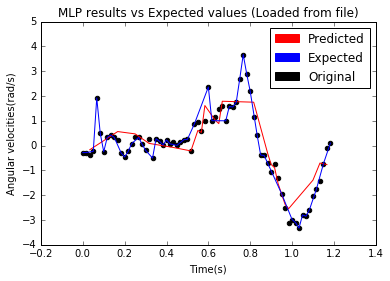

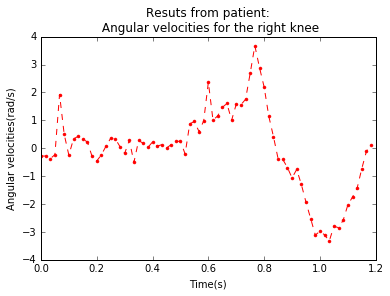

Accuracy: 0.898618497718


In [18]:
#print from previously saved data
%matplotlib inline

results = saved_ann.predict(test_sorted[:, 1:-1])


plt.plot(test_sorted[:, 0], results, c='r') # ( sorted time, results)
plt.plot(train_sorted[:, 0], train_sorted[:,1], c='b' ) #expected
plt.scatter(time_stamp, y, c='k')

plt.xlabel("Time(s)")
plt.ylabel("Angular velocities(rad/s)")

red_patch = mpatches.Patch(color='red', label='Predicted')
blue_patch = mpatches.Patch(color='blue', label ='Expected')
black_patch = mpatches.Patch(color='black', label ='Original')
plt.legend(handles=[red_patch, blue_patch, black_patch])
plt.title("MLP results vs Expected values (Loaded from file)")
plt.show()




plt.plot(time_stamp, y,'--.', c='r')
plt.xlabel("Time(s)")
plt.ylabel("Angular velocities(rad/s)")
plt.title("Resuts from patient:\n"
         " Angular velocities for the right knee")
plt.show()


print "Accuracy:", saved_ann.score(X_test_std, y_test)
#print "Accuracy test 2", r2_score(test_sorted[:,-1], results)